In [2]:
%pip install scikit-learn

import seaborn as sns
from sklearn.preprocessing import LabelEncoder

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [4]:
df = sns.load_dataset('iris')

In [5]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
encoder = LabelEncoder()
df['species'] = encoder.fit_transform(df['species'])

In [7]:
df.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
 df = df[['sepal_length', 'petal_length', 'species']]

In [10]:
df.head(5)

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [24]:
print(df.iloc[:, :-1])


     sepal_length  petal_length
0             5.1           1.4
1             4.9           1.4
2             4.7           1.3
3             4.6           1.5
4             5.0           1.4
..            ...           ...
145           6.7           5.2
146           6.3           5.0
147           6.5           5.2
148           6.2           5.4
149           5.9           5.1

[150 rows x 2 columns]


In [27]:
print(df.iloc[:, -1])

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


In [28]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 2) (30, 2) (120,) (30,)


In [33]:
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')

In [34]:
clf.fit(X_train, y_train)

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [35]:
y_pred = clf.predict(X_test)

In [36]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [37]:
print(accuracy_score(y_test, y_pred))

1.0


In [38]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=encoder.classes_, index=encoder.classes_)

,setosa,versicolor,virginica
setosa,10,0,0
versicolor,0,9,0
virginica,0,0,11


In [39]:
#prediction:

In [40]:
query = np.array([[5.1, 1.5]])
clf.predict_proba(query)

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.60815881e-01, 3.91837200e-02, 3.98809184e-07]])

In [41]:
clf.predict(query)

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

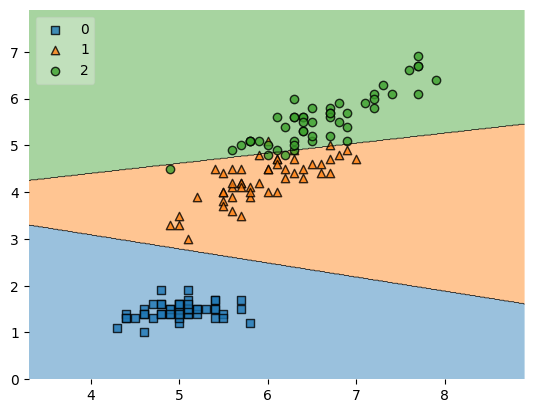

In [43]:
%pip install mlxtend

from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X.values, y.values, clf=clf, legend=2)